# T20I Dataset EDA (As Per Match)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Set plot style

In [2]:
sns.set(style="whitegrid", palette="muted")

## Load Dataset

In [4]:
t20i_matches  = pd.read_csv("../data/T20i/t20i_match_summary.csv")

In [6]:
print("Shape:", t20i_matches.shape)

Shape: (1815, 11)


In [7]:
print("Columns:", t20i_matches.columns)

Columns: Index(['match_id', 'total_runs', 'total_extras', 'total_wickets', 'winner',
       'venue', 'season', 'toss_winner', 'toss_decision', 'batting_team',
       'bowling_team'],
      dtype='object')


In [8]:
t20i_matches.head()

,match_id,total_runs,total_extras,total_wickets,winner,venue,season,toss_winner,toss_decision,batting_team,bowling_team
0,211028,246,12,18,England,The Rose Bowl,2005,England,bat,"['England', 'Australia']","['Australia', 'England']"
1,211048,370,14,15,Australia,Eden Park,2004/05,Australia,bat,"['Australia', 'New Zealand']","['New Zealand', 'Australia']"
2,222678,248,19,15,New Zealand,New Wanderers Stadium,2005/06,New Zealand,field,"['South Africa', 'New Zealand']","['New Zealand', 'South Africa']"
3,225263,271,21,12,Pakistan,County Ground,2006,England,bat,"['England', 'Pakistan']","['Pakistan', 'England']"
4,225271,299,25,15,Sri Lanka,The Rose Bowl,2006,Sri Lanka,bat,"['Sri Lanka', 'England']","['England', 'Sri Lanka']"


## Basic Stats

In [10]:
print("\nT20I Seasons:", t20i_matches['season'].unique())
print("Number of teams:", len(t20i_matches['batting_team'].unique()))
print("Most frequent venues:\n", t20i_matches['venue'].value_counts().head(10))


T20I Seasons: ['2005' '2004/05' '2005/06' '2006' '2006/07' '2007' '2007/08' '2008'
 '2009' '2008/09' '2009/10' '2010' '2010/11' '2011' '2011/12' '2012/13'
 '2012' '2013' '2013/14' '2014' '2014/15' '2015' '2015/16' '2016'
 '2016/17' '2017' '2017/18' '2018' '2018/19' '2019' '2019/20' '2020'
 '2020/21' '2021' '2021/22' '2022' '2022/23' '2023' '2023/24' '2024'
 '2024/25']
Number of teams: 200
Most frequent venues:
 venue
Dubai International Cricket Stadium                        65
Harare Sports Club                                         52
R Premadasa Stadium                                        33
Shere Bangla National Stadium                              32
Sharjah Cricket Stadium                                    30
Shere Bangla National Stadium, Mirpur                      29
Al Amerat Cricket Ground Oman Cricket (Ministry Turf 1)    27
County Ground                                              27
Pallekele International Cricket Stadium                    26
Sylhet Stadium      

## RUNS & WICKETS DISTRIBUTION

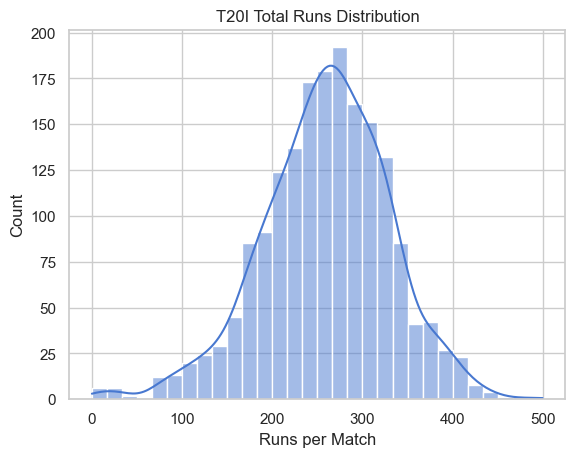

In [11]:
sns.histplot(t20i_matches['total_runs'], bins=30, kde=True)
plt.title("T20I Total Runs Distribution")
plt.xlabel("Runs per Match")
plt.savefig("../Reports/Visuals/T20i/T20I Total Runs Distribution.png")
plt.show()

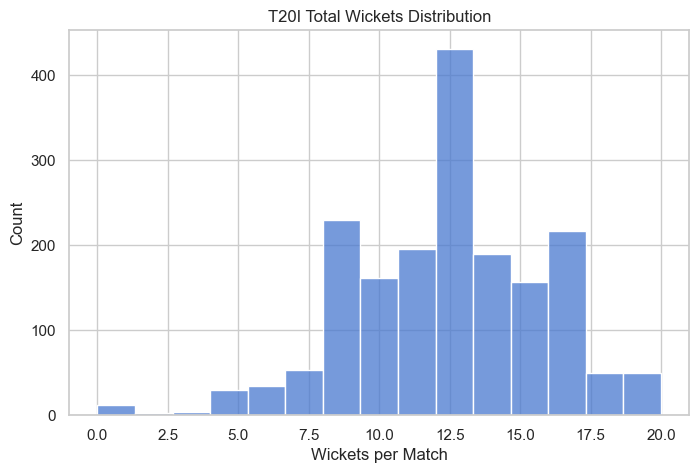

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(t20i_matches['total_wickets'], bins=15, kde=False)
plt.title("T20I Total Wickets Distribution")
plt.xlabel("Wickets per Match")
plt.savefig("../Reports/Visuals/T20i/T20I Total Wickets Distribution.png")
plt.show()

## TOSS IMPACT

In [13]:
toss_impact = (t20i_matches['toss_winner'] == t20i_matches['winner']).mean()
print(f"T20I Toss winner also won match: {toss_impact:.2%}")

T20I Toss winner also won match: 48.93%


## VENUE TRENDS

In [14]:
top_venues = t20i_matches['venue'].value_counts().head(10).index
venue_data = t20i_matches[t20i_matches['venue'].isin(top_venues)]

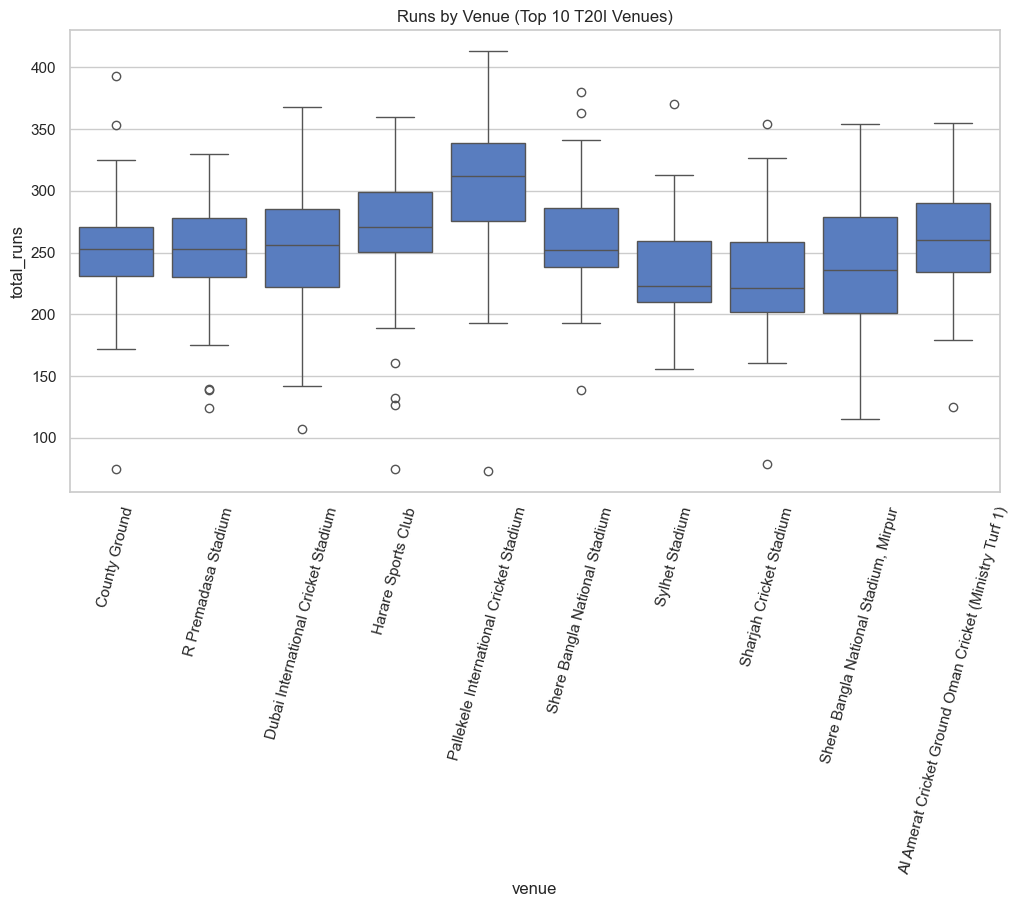

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='venue', y='total_runs', data=venue_data)
plt.xticks(rotation=75)
plt.title("Runs by Venue (Top 10 T20I Venues)")
plt.savefig("../Reports/Visuals/T20i/Runs by Venue (Top 10 T20I Venues).png")
plt.show()

## TEAM WINNING STATS

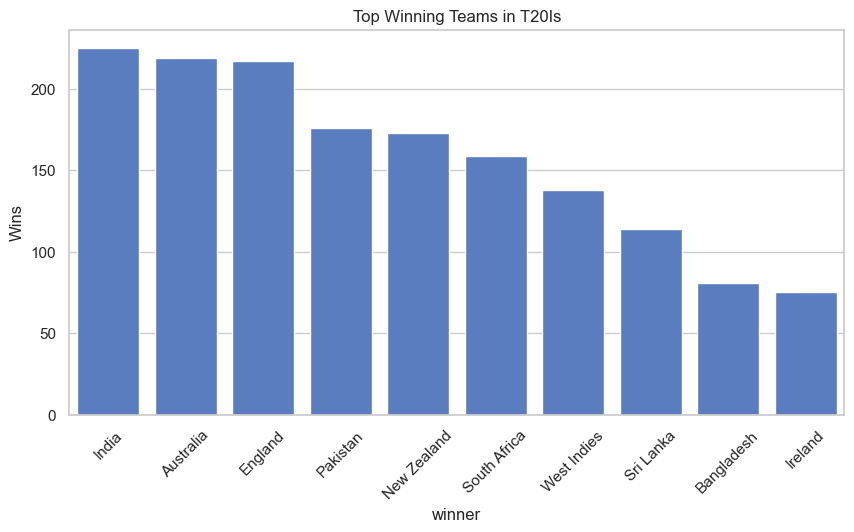

In [17]:
team_wins = t20i_matches['winner'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=team_wins.index, y=team_wins.values)
plt.title("Top Winning Teams in T20Is")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.savefig("../Reports/Visuals/T20i/Top Winning Teams in T20Is.png")
plt.show()

# T20I Dataset EDA (As Per Over)

## Load Dataset

In [21]:
over_summary = pd.read_csv("../data/T20i/t20i_over_features.csv")

In [22]:
print("Shape:", over_summary.shape)

Shape: (67329, 19)


In [24]:
over_summary.head()

,match_id,innings,over,batting_team,runs_off_bat,extras,wicket,cumulative_runs,cumulative_wickets,run_rate,winner,venue,season,toss_winner,toss_decision,overs_left,target_runs,required_runs,required_run_rate
0,211028,1,0,England,3,1,0,3,0,inf,England,The Rose Bowl,2005,England,bat,20,173,NaN,NaN
1,211028,1,1,England,1,1,0,4,0,4.0,England,The Rose Bowl,2005,England,bat,19,173,NaN,NaN
2,211028,1,2,England,14,0,0,18,0,9.0,England,The Rose Bowl,2005,England,bat,18,173,NaN,NaN
3,211028,1,3,England,9,0,1,27,1,9.0,England,The Rose Bowl,2005,England,bat,17,173,NaN,NaN
4,211028,1,4,England,11,3,0,38,1,9.5,England,The Rose Bowl,2005,England,bat,16,173,NaN,NaN


## Basic Stats

In [31]:
over_summary = over_summary.replace([np.inf, -np.inf], np.nan)

In [32]:
numeric_cols = over_summary.select_dtypes(include=[np.number]).columns
over_summary[numeric_cols] = over_summary[numeric_cols].fillna(0)

In [33]:
print("\nColumns:", over_summary.columns.tolist())
print("\nMissing values:\n", over_summary.isna().sum())
print("\nDescriptive stats:\n", over_summary.describe())


Columns: ['match_id', 'innings', 'over', 'batting_team', 'runs_off_bat', 'extras', 'wicket', 'cumulative_runs', 'cumulative_wickets', 'run_rate', 'winner', 'venue', 'season', 'toss_winner', 'toss_decision', 'overs_left', 'target_runs', 'required_runs', 'required_run_rate']

Missing values:
 match_id              0
innings               0
over                  0
batting_team          0
runs_off_bat          0
extras                0
wicket                0
cumulative_runs       0
cumulative_wickets    0
run_rate              0
winner                0
venue                 0
season                0
toss_winner           0
toss_decision         0
overs_left            0
target_runs           0
required_runs         0
required_run_rate     0
dtype: int64

Descriptive stats:
            match_id       innings          over  runs_off_bat        extras  \
count  6.732900e+04  67329.000000  67329.000000  67329.000000  67329.000000   
mean   1.068167e+06      1.475902      9.077485      6.9953

## RUNS PER OVER

In [34]:
avg_runs = over_summary.groupby("over")["runs_off_bat"].mean()

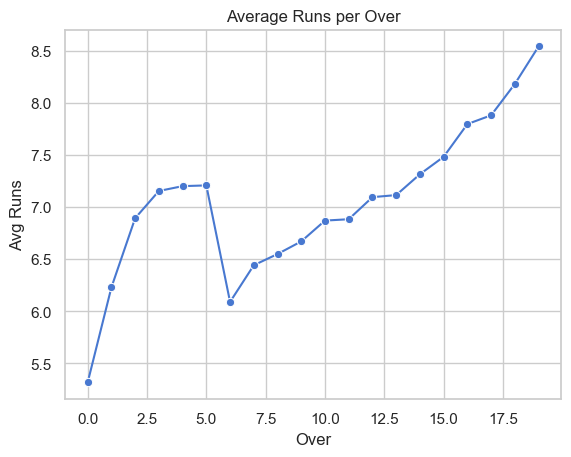

In [37]:
plt.figure()
sns.lineplot(x=avg_runs.index, y=avg_runs.values, marker="o")
plt.title("Average Runs per Over")
plt.xlabel("Over")
plt.savefig("../Reports/Visuals/T20i/Average Runs per Over.png")
plt.ylabel("Avg Runs")
plt.show()

## WICKETS PER OVER

In [36]:
avg_wickets = over_summary.groupby("over")["wicket"].mean()

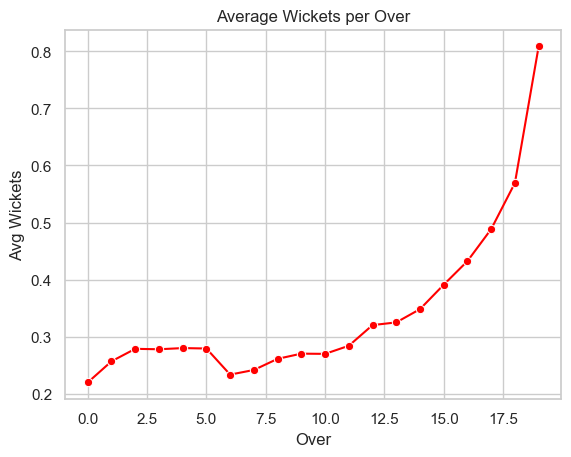

In [38]:
plt.figure()
sns.lineplot(x=avg_wickets.index, y=avg_wickets.values, marker="o", color="red")
plt.title("Average Wickets per Over")
plt.xlabel("Over")
plt.ylabel("Avg Wickets")
plt.savefig("../Reports/Visuals/T20i/Avg Wickets.png")
plt.show()

## RUN RATE PROGRESSION

In [39]:
avg_runrate = over_summary.groupby("over")["run_rate"].mean()

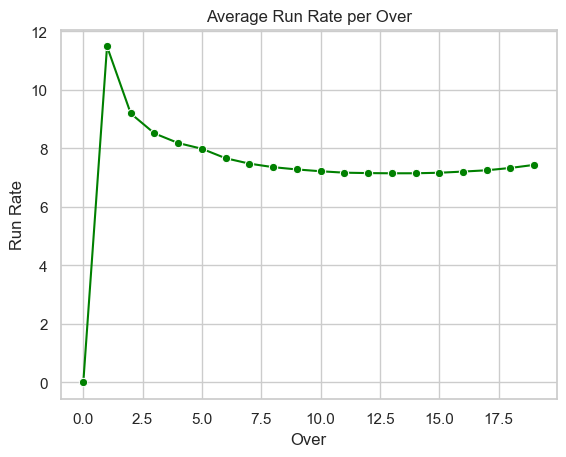

In [40]:
plt.figure()
sns.lineplot(x=avg_runrate.index, y=avg_runrate.values, marker="o", color="green")
plt.title("Average Run Rate per Over")
plt.xlabel("Over")
plt.ylabel("Run Rate")
plt.savefig("../Reports/Visuals/T20i/Average Run Rate per Over.png")
plt.show()

## POWERPLAY VS DEATH OVERS

In [41]:
powerplay = over_summary[over_summary["over"] <= 6]
middle = over_summary[(over_summary["over"] > 6) & (over_summary["over"] <= 15)]
death = over_summary[over_summary["over"] > 15]

In [42]:
print("Powerplay Avg Runs:", powerplay["runs_off_bat"].mean())
print("Middle Overs Avg Runs:", middle["runs_off_bat"].mean())
print("Death Overs Avg Runs:", death["runs_off_bat"].mean())

Powerplay Avg Runs: 6.582064567556795
Middle Overs Avg Runs: 6.927574426549536
Death Overs Avg Runs: 8.077538247566064


## CUMULATIVE RUNS PROGRESSION

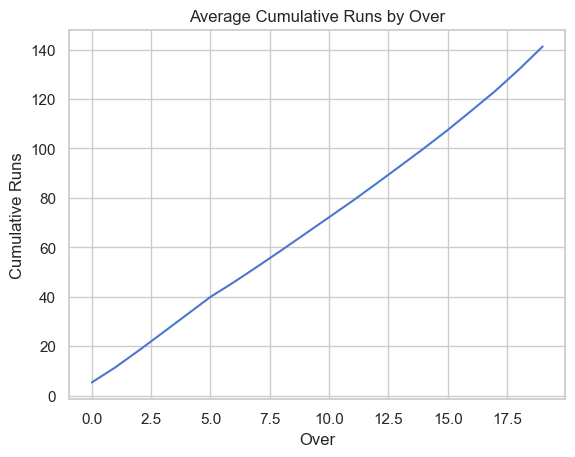

In [44]:
plt.figure()
sns.lineplot(data=over_summary, x="over", y="cumulative_runs", estimator="mean", errorbar=None)
plt.title("Average Cumulative Runs by Over")
plt.xlabel("Over")
plt.ylabel("Cumulative Runs")
plt.savefig("../Reports/Visuals/T20i/Average Cumulative Runs by Over.png")
plt.show()

## DISTRIBUTION PLOTS

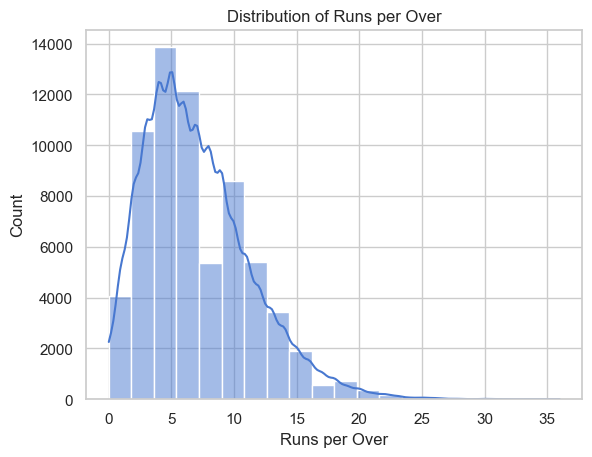

In [45]:
plt.figure()
sns.histplot(over_summary["runs_off_bat"], bins=20, kde=True)
plt.title("Distribution of Runs per Over")
plt.xlabel("Runs per Over")
plt.savefig("../Reports/Visuals/T20i/Distribution of Runs per Over.png")
plt.show()

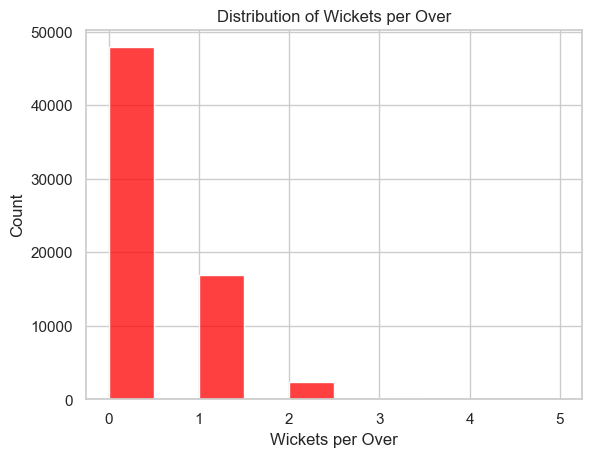

In [46]:
plt.figure()
sns.histplot(over_summary["wicket"], bins=10, kde=False, color="red")
plt.title("Distribution of Wickets per Over")
plt.xlabel("Wickets per Over")
plt.savefig("../Reports/Visuals/T20i/Distribution of Wickets per Over.png")
plt.show()